In [22]:
import sklearn as sk 
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt

%matplotlib inline


In [23]:
def draw_tree_decision_boundary(clf, X, y, feature_names=None, class_names=None):

    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    
    
    # Parameters
    n_classes = len(np.unique(y))
    n_features = X.shape[1]
    plot_colors = "rby"
    plot_step = 0.02
    class_pairs = list(itertools.combinations(np.unique(y),2))
    plot_rows = int(np.ceil(len(class_pairs)/3))
    
    n_features_pairs = list(itertools.combinations(range(X.shape[1]),2))
    plot_cols = int(min(len(n_features_pairs),3))
    
    
    if feature_names is None:
        feature_names = ['x{}'.format(n) for n in range(1,n_features+1)]

    if class_names is None:
        class_names = ['y{}'.format(n) for n in range(1,n_classes+1)]

    
    for pairidx, pair in enumerate(n_features_pairs):
        # We only take the two corresponding features
        P = X[:, list(pair)]
        
        
        # Plot the decision boundary
        row = int(np.floor(pairidx/plot_cols))
        col = int(pairidx % plot_cols)
        ax = plt.subplot2grid((plot_rows, plot_cols), (row,col), aspect='equal')

        x_min, x_max = P[:, 0].min() - 1, P[:, 0].max() + 1
        y_min, y_max = P[:, 1].min() - 1, P[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(feature_names[pair[0]])
        plt.ylabel(feature_names[pair[1]])
        #ax.set_aspect('equal')
        #ax.set(adjustable='box', aspect='equal')
        
        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(P[idx, 0], P[idx, 1], c=color, label=class_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='best', borderpad=0, handletextpad=0)
    #plt.axis("tight")
    
    #plt.show()
    return plt

In [24]:
from sklearn.datasets import make_circles, make_moons
X, y = make_circles(noise=0.35, n_samples=500, factor=.3)
X, y = make_moons(noise=0.35, n_samples=1200)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(max_depth=5)
svm_clf = SVC(probability=True )

In [27]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf),('svc', svm_clf)],
    voting = 'soft'
    )

In [28]:
from sklearn.metrics import accuracy_score

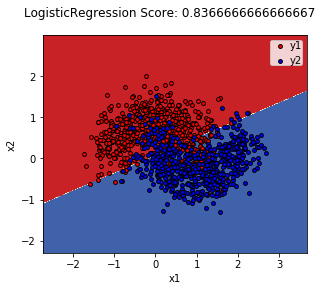

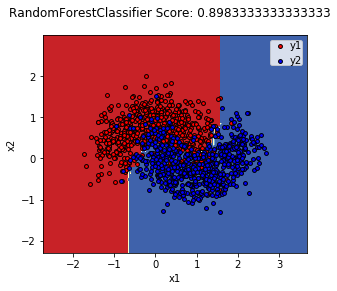

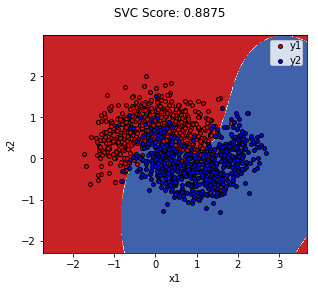

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


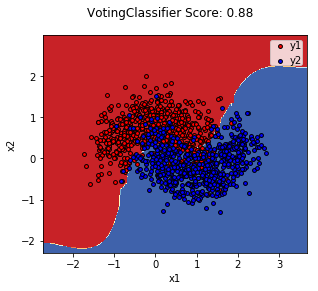

In [29]:
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X,y)
    y_pred = clf.predict(X)
    name = clf.__class__.__name__
    score = accuracy_score(y,y_pred)
    plt = draw_tree_decision_boundary(clf, X, y)
    plt.suptitle('{} Score: {}'.format(name,score))
    plt.show()

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 500,
    n_jobs = -1,
    oob_score = True,
    bootstrap = True,
    max_samples = 1.0,
    bootstrap_features = True,
    max_features = 1.0
    )

bag_clf.fit(X,y)
bag_clf.oob_score_

0.8625

In [32]:
from sklearn.metrics import accuracy_score

X_test, y_test = make_moons(noise=0.35, n_samples=1200)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

In [33]:
bag_clf.oob_decision_function_

array([[0.98882682, 0.01117318],
       [0.02197802, 0.97802198],
       [0.82183908, 0.17816092],
       ...,
       [0.67582418, 0.32417582],
       [0.17098446, 0.82901554],
       [0.10752688, 0.89247312]])

In [34]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [35]:
rnd_clf = RandomForestClassifier(
    n_estimators= 500,
    max_leaf_nodes = 16,
    n_jobs = -1
    )
rnd_clf.fit(X,y)
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.88

In [36]:
ext_clf = ExtraTreesClassifier(
    n_estimators= 500,
    max_leaf_nodes = 16,
    n_jobs = -1
    )
rnd_clf.fit(X,y)
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.88

In [37]:
from sklearn.datasets import load_iris

iris = load_iris()


rnd_clf = RandomForestClassifier(
    n_estimators= 500,
    n_jobs = -1
    )

rnd_clf.fit(iris['data'],iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.09734950913654203
sepal width (cm) 0.02693637779022899
petal length (cm) 0.4336825314028447
petal width (cm) 0.4420315816703839


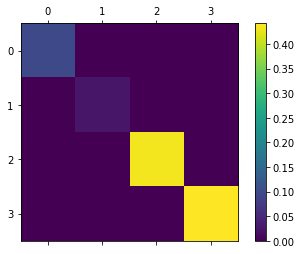

In [38]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
cax1 = ax1.matshow(np.diag(rnd_clf.feature_importances_))
fig.colorbar(cax1)

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),
    n_estimators = 200,
    algorithm = 'SAMME.R',
    learning_rate = 0.5
    )

ada_clf.fit(X,y)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8891666666666667

In [41]:
from sklearn.tree import DecisionTreeRegressor

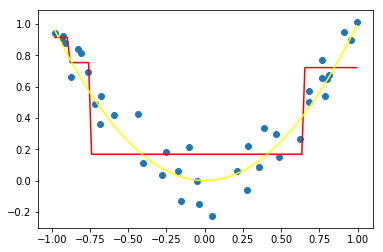

In [44]:
n_obs = 40
power = 3

mu = 0
sigma = 0.1 # mean and standard deviation
x = 2*np.random.rand(n_obs,1)-1
noise = np.random.normal(mu, sigma, size=(n_obs,1))
y = np.power(x,2)+noise

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x,y)
x_test = np.linspace(np.min(x),np.max(x),100).reshape(-1,1)
y1 = tree_reg1.predict(x_test)
plt.scatter(x, y)
plt.plot(x_test, y1,color='red')
plt.plot(x_test, np.square(x_test),color='yellow')

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


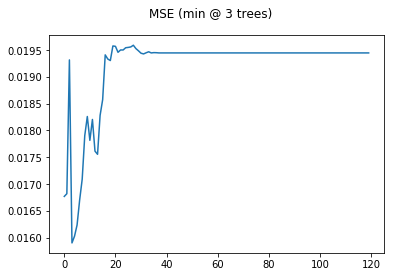

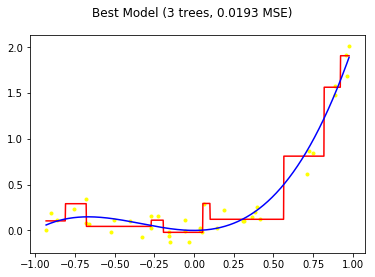

In [57]:
n_obs = 40
power = 3

mu = 0
sigma = 0.1 # mean and standard deviation
x = 2*np.random.rand(n_obs,1)-1
noise = np.random.normal(mu, sigma, size=(n_obs,1))

def f(x):
    return np.power(x,3)+np.power(x,2)

y = f(x)+noise
x_test = np.linspace(np.min(x),np.max(x),1000).reshape(-1,1)
y_test = f(x_test)


n_estimators = 120

gbr = GradientBoostingRegressor(
    max_depth = 2,
    n_estimators = n_estimators,
    learning_rate = 1.0
    )

gbr.fit(x,y)



errors = [mean_squared_error(y_test,y_gbr) for y_gbr 
          in gbr.staged_predict(x_test)]
best_n_estimators = np.argmin(errors)

plt.plot(errors)
plt.suptitle('MSE (min @ {} trees)'.format(best_n_estimators))
plt.show()



gbr_best = GradientBoostingRegressor(
    max_depth = 2,
    n_estimators = best_n_estimators,
    learning_rate = 1.0
    )

gbr_best.fit(x,y)
y_gbr_best = gbr_best.predict(x_test)
error = mean_squared_error(y_test,y_gbr_best) 


plt.scatter(x, y, color='yellow', marker='.')
plt.plot(x_test, y_gbr_best,color='red')
plt.plot(x_test, y_test,color='blue')
plt.suptitle('Best Model ({} trees, {:.4f} MSE)'.format(best_n_estimators, error))
plt.show()

39


/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


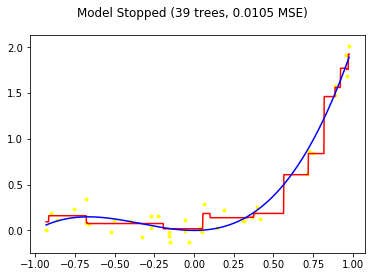

In [59]:
gbr_stop = GradientBoostingRegressor(
    max_depth = 2,
    warm_start = True
    )

min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1,120):
    gbr_stop.n_estimators = n_estimators
    gbr_stop.fit(x,y)
    y_pred = gbr_stop.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            print(n_estimators)
            break

plt.scatter(x, y, color='yellow', marker='.')
plt.plot(x_test, y_pred,color='red')
plt.plot(x_test, y_test,color='blue')
plt.suptitle('Model Stopped ({} trees, {:.4f} MSE)'.format(n_estimators, val_error))
plt.show()